# ALY6040_Data_Mining_Group_Project_Week_2_EDA

In [81]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
warnings.filterwarnings("ignore")
from sklearn.metrics import recall_score, f1_score, accuracy_score, mean_squared_error, precision_score
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/daksh-17/Project/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Changing the datatype of total charges to numeric

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
data_category =data.select_dtypes(include='object')

In [9]:
data_category.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#Missing values in Total charges
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### NaN values in total charges displayed and removed

In [12]:
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Text(0.5, 1.0, 'Total Chrages Distribution')

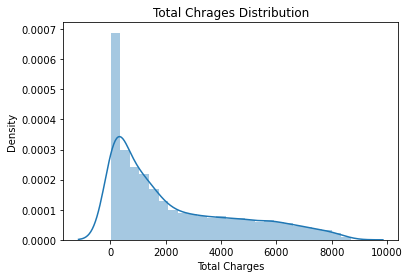

In [13]:
sns.distplot(data['TotalCharges'])
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Total Chrages Distribution')

In [14]:
#checking 0 in tenure
f_t =data['tenure'] == 0

In [15]:
#11 values with total charge missing has 0 tenure
f_t.describe()

count      7043
unique        2
top       False
freq       7032
Name: tenure, dtype: object

In [16]:
data.dropna(inplace = True)

In [17]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

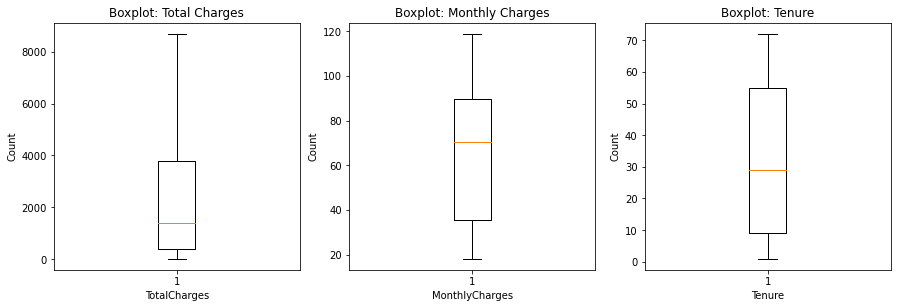

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.boxplot(data['TotalCharges'])
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.title('Boxplot: Total Charges')

plt.subplot(2,3,2)
plt.boxplot(data['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.title('Boxplot: Monthly Charges')

plt.subplot(2,3,3)
plt.boxplot(data['tenure'])
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Boxplot: Tenure')
plt.show()

# **Gender Distribution**

In [19]:
df1 = data.groupby(['gender']).size()
df1
#df1 = df1.unstack()
#df1.plot(kind='bar')


gender
Female    3483
Male      3549
dtype: int64

# **Churn Distribution**

In [20]:
pie2 = data.groupby(['Churn']).size()
pie2



Churn
No     5163
Yes    1869
dtype: int64

([<matplotlib.patches.Wedge at 0x15a5ebc4fa0>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'No'),
  Text(0.7383051242403964, -0.8154174044747714, 'Yes')])

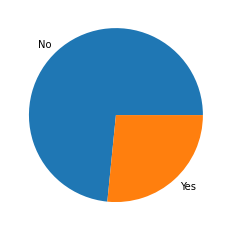

In [21]:
labels = ['No', 'Yes']
plt.pie(pie2, labels = labels)


# CHURN GROUPED BY SENIORITY OF THE CITIZEN

In [22]:
senior_citizen = data.groupby(['Churn','SeniorCitizen']).size()
senior_citizen



Churn  SeniorCitizen
No     0                4497
       1                 666
Yes    0                1393
       1                 476
dtype: int64

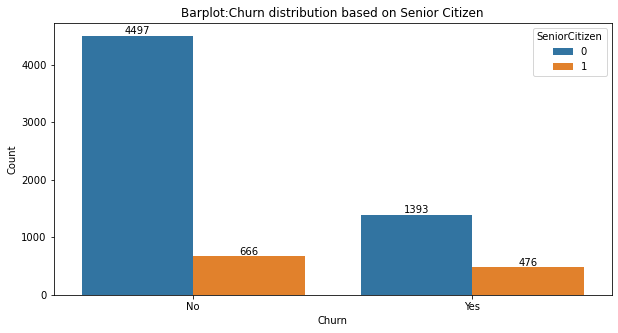

In [23]:
plt.figure(figsize=(10,5))
bar_1 = sns.countplot(x='Churn', hue = 'SeniorCitizen', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Senior Citizen')
for container in bar_1.containers:
    bar_1.bar_label(container)

# Contract type

In [24]:
contract_type = data.groupby(['Churn','Contract']).size()
contract_type

Churn  Contract      
No     Month-to-month    2220
       One year          1306
       Two year          1637
Yes    Month-to-month    1655
       One year           166
       Two year            48
dtype: int64

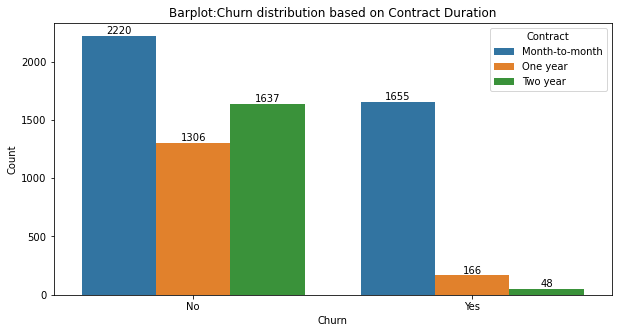

In [25]:
plt.figure(figsize=(10,5))
bar_2 =sns.countplot(x='Churn', hue = 'Contract', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Contract Duration')
for container in bar_2.containers:
    bar_2.bar_label(container)

# Payment Type

In [26]:
payment_type = data.groupby(['Churn','PaymentMethod']).size()
payment_type

Churn  PaymentMethod            
No     Bank transfer (automatic)    1284
       Credit card (automatic)      1289
       Electronic check             1294
       Mailed check                 1296
Yes    Bank transfer (automatic)     258
       Credit card (automatic)       232
       Electronic check             1071
       Mailed check                  308
dtype: int64

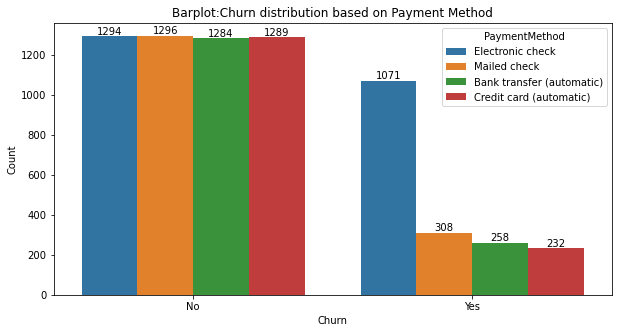

In [27]:
plt.figure(figsize=(10,5))
bar_3 =sns.countplot(x='Churn', hue = 'PaymentMethod', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Payment Method')
for container in bar_3.containers:
    bar_3.bar_label(container)

# Internet Service

In [28]:
intser_type = data.groupby(['Churn','InternetService']).size()
intser_type

Churn  InternetService
No     DSL                1957
       Fiber optic        1799
       No                 1407
Yes    DSL                 459
       Fiber optic        1297
       No                  113
dtype: int64

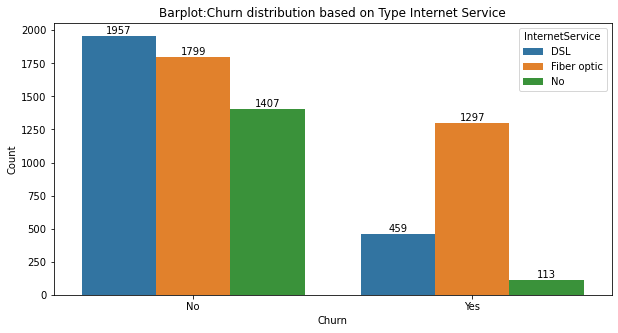

In [29]:
plt.figure(figsize=(10,5))
bar_4 =sns.countplot(x='Churn', hue = 'InternetService', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Type Internet Service')
for container in bar_4.containers:
    bar_4.bar_label(container)

# Distribution of Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

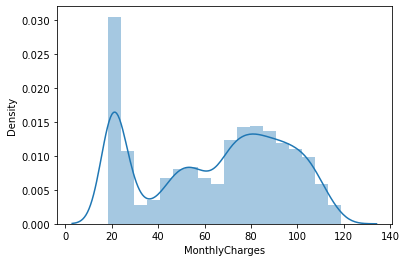

In [30]:
sns.distplot(data['MonthlyCharges'])

In [31]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Monthly charges paid for different contracts

Text(0.5, 1.0, 'Barplot:Churn distribution based Total charges and Type of Line')

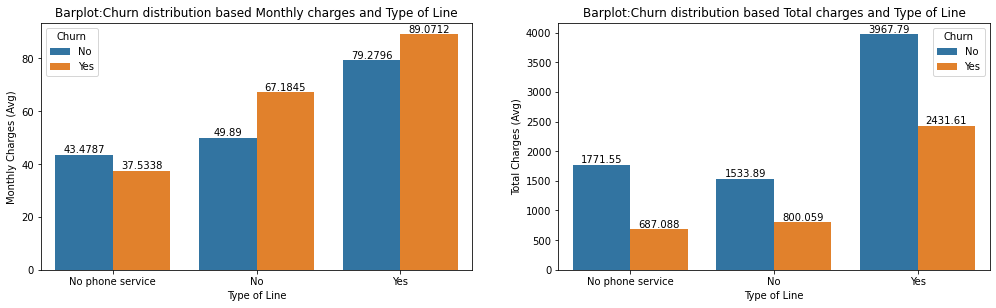

In [32]:
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
monthly_charge=sns.barplot(x='MultipleLines', y='MonthlyCharges', hue='Churn', data=data, ci=None)
for container in monthly_charge.containers:
    monthly_charge.bar_label(container)
    plt.xlabel('Type of Line')
plt.ylabel('Monthly Charges (Avg)')
plt.title('Barplot:Churn distribution based Monthly charges and Type of Line')

plt.subplot(2,2,2)
Tot_charge=sns.barplot(x='MultipleLines', y='TotalCharges', hue='Churn', data=data, ci=None)
for container in Tot_charge.containers:
    Tot_charge.bar_label(container)
    plt.xlabel('Type of Line')
plt.ylabel('Total Charges (Avg)')
plt.title('Barplot:Churn distribution based Total charges and Type of Line')

Text(0.5, 1.0, 'Barplot:Churn distribution based Total charges and Type of PaymentMethod')

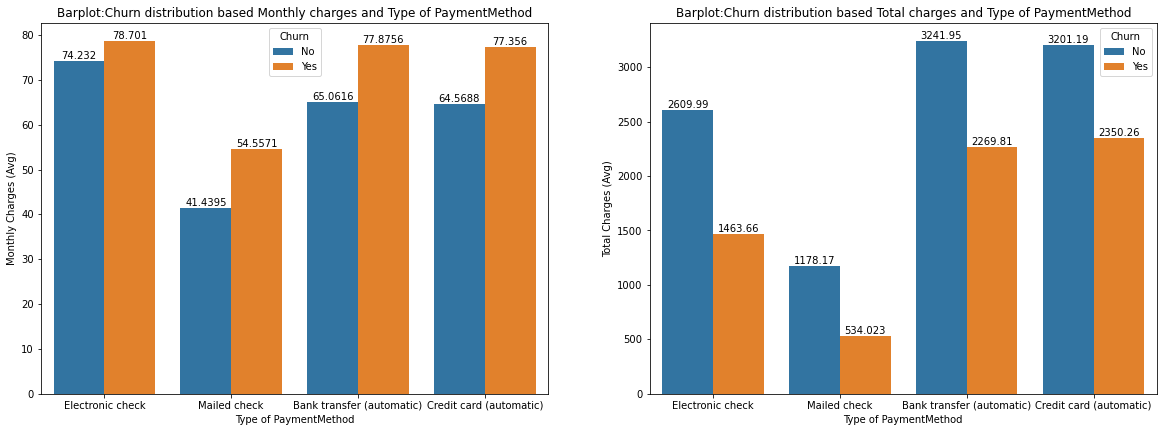

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
monthly_charge=sns.barplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=data, ci=None)
for container in monthly_charge.containers:
    monthly_charge.bar_label(container)
    plt.xlabel('Type of PaymentMethod')
plt.ylabel('Monthly Charges (Avg)')
plt.title('Barplot:Churn distribution based Monthly charges and Type of PaymentMethod')

plt.subplot(2,2,2)
Tot_charge=sns.barplot(x='PaymentMethod', y='TotalCharges', hue='Churn', data=data, ci=None)
for container in Tot_charge.containers:
    Tot_charge.bar_label(container)
    plt.xlabel('Type of PaymentMethod')
plt.ylabel('Total Charges (Avg)')
plt.title('Barplot:Churn distribution based Total charges and Type of PaymentMethod')

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

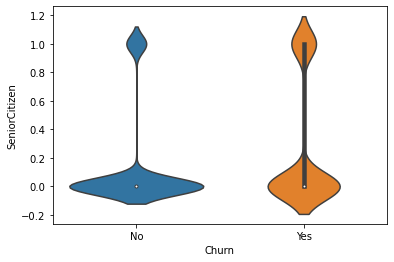

In [34]:
sns.violinplot(x ='Churn', y ='SeniorCitizen', data = data, split = True)

In [35]:
groupby_type = data.groupby(["PhoneService","StreamingTV"]).Churn.value_counts(normalize=True)

In [36]:
groupby_type.dtypes
groupby_type

PhoneService  StreamingTV          Churn
No            No                   No       0.732997
                                   Yes      0.267003
              Yes                  No       0.773852
                                   Yes      0.226148
Yes           No                   No       0.653400
                                   Yes      0.346600
              No internet service  No       0.925658
                                   Yes      0.074342
              Yes                  No       0.690083
                                   Yes      0.309917
Name: Churn, dtype: float64

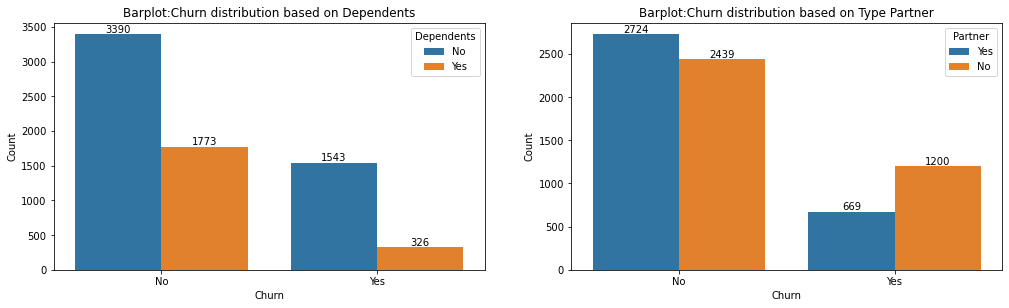

In [37]:
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
bar_5 =sns.countplot(x='Churn', hue = 'Dependents', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Dependents')
for container in bar_5.containers:
    bar_5.bar_label(container)

plt.subplot(2,2,2)
bar_6 =sns.countplot(x='Churn', hue = 'Partner', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Type Partner')
for container in bar_6.containers:
    bar_6.bar_label(container)

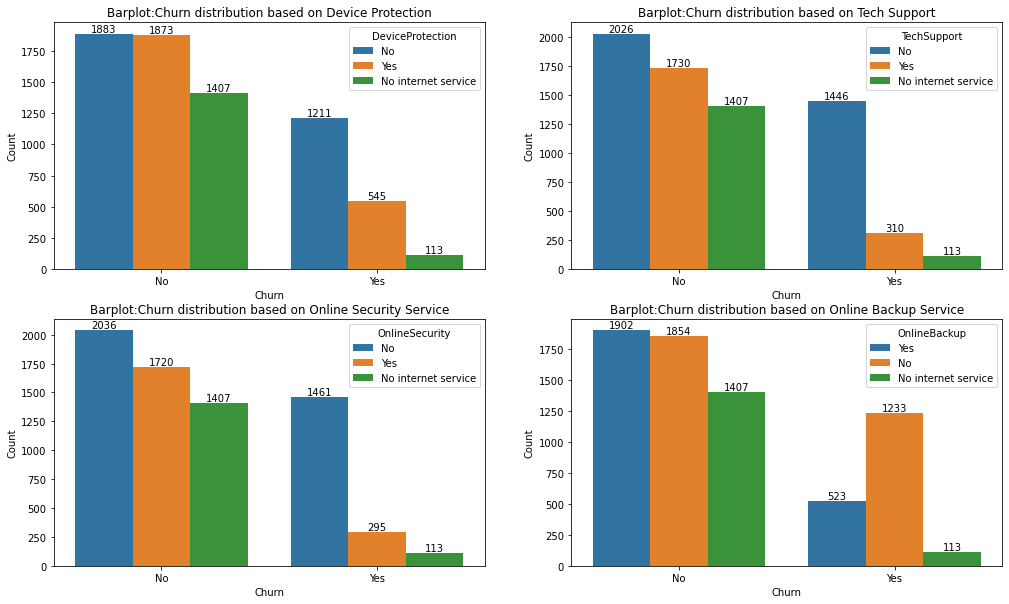

In [38]:
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
bar_7 =sns.countplot(x='Churn', hue = 'DeviceProtection', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Device Protection')
for container in bar_7.containers:
    bar_7.bar_label(container)

plt.subplot(2,2,2)
bar_8 =sns.countplot(x='Churn', hue = 'TechSupport', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Tech Support')
for container in bar_8.containers:
    bar_8.bar_label(container)

plt.subplot(2,2,3)
bar_9 =sns.countplot(x='Churn', hue = 'OnlineSecurity', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Online Security Service')
for container in bar_9.containers:
    bar_9.bar_label(container)
    
plt.subplot(2,2,4)
bar_10 =sns.countplot(x='Churn', hue = 'OnlineBackup', data = data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Barplot:Churn distribution based on Online Backup Service')
for container in bar_10.containers:
    bar_10.bar_label(container)


# Encoding for Correlation Plot

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [40]:
dataset = pd.get_dummies(data, columns = ['gender','Partner','Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first=True)
dataset.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [41]:
final_dataset = dataset.drop(['customerID'], axis = 1)
final_dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


<AxesSubplot:>

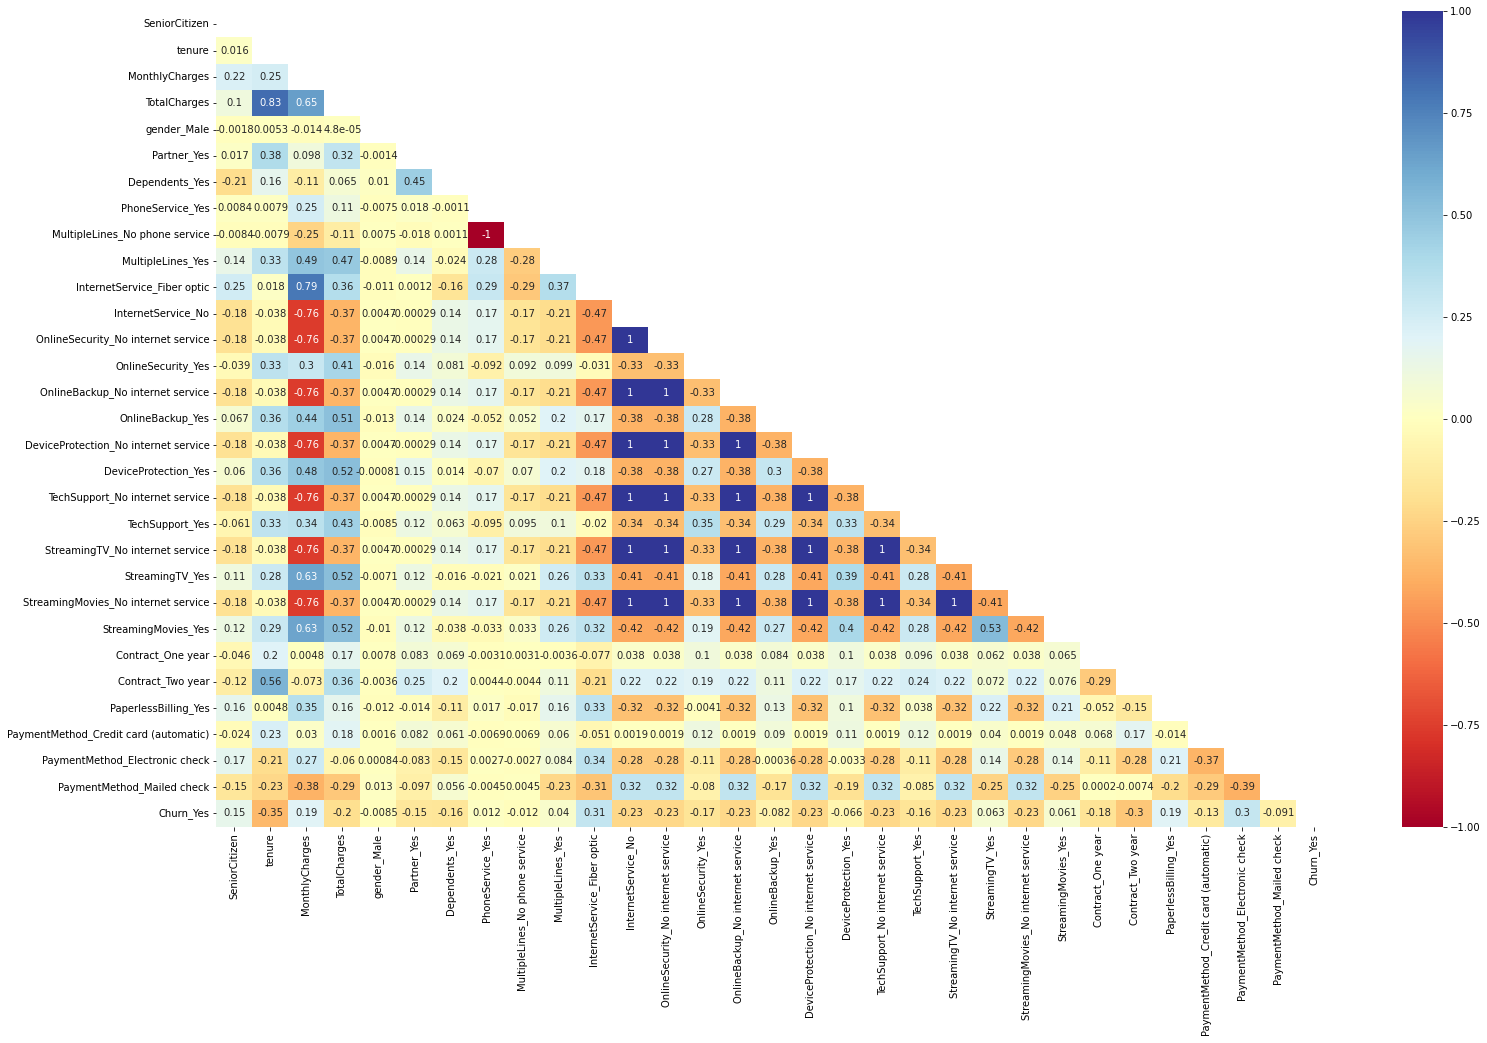

In [42]:
corr = final_dataset.corr()
ax , fig  = plt.subplots(figsize =(25,15))
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr,cmap='RdYlBu', annot=True, mask=matrix)

In [43]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   PhoneService_Yes                       7032 non-null   uint8  
 8   MultipleLines_No phone service         7032 non-null   uint8  
 9   MultipleLines_Yes                      7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

In [44]:
for i in final_dataset.columns:
    print(i)
    print(final_dataset[i].value_counts())

SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64
TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64
gender_Male
1    3549
0    3483
Name: gender_Male, dtype: int64
Partner_Yes
0    3639
1    3393
Name: Partner_Yes, dtype: int64
Dependents_Yes
0    4933
1    2099
Name: Dependents_Yes, dtype: int64
PhoneService_Yes
1    6352
0     680
Name: PhoneService_Yes, dtype: int64
MultipleLines_No phone service
0    6352
1     680
Name: MultipleLines_No phone ser

In [45]:
y = final_dataset.pop("Churn_Yes")
x = final_dataset

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data.round(1)

,feature,VIF
0,SeniorCitizen,1.2
1,tenure,7.6
2,MonthlyCharges,866.1
3,TotalCharges,10.8
4,gender_Male,1.0
5,Partner_Yes,1.5
6,Dependents_Yes,1.4
7,PhoneService_Yes,1773.5
8,MultipleLines_No phone service,60.8
9,MultipleLines_Yes,7.3


In [47]:
x.drop(columns=['tenure','MonthlyCharges','PhoneService_Yes','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','StreamingTV_No internet service'
               ,'StreamingMovies_No internet service','TechSupport_No internet service'], axis=1, inplace = True)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data.round(1)

,feature,VIF
0,SeniorCitizen,1.4
1,TotalCharges,8.0
2,gender_Male,1.9
3,Partner_Yes,2.8
4,Dependents_Yes,2.0
5,MultipleLines_No phone service,1.4
6,MultipleLines_Yes,2.5
7,InternetService_Fiber optic,3.4
8,InternetService_No,2.5
9,OnlineSecurity_Yes,1.9


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, train_size=0.80)
#get shape of train and test data
print("train size X : ",x_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",x_test.shape)
print("test size y : ",y_test.shape)

train size X :  (5625, 21)
train size y :  (5625,)
test size X :  (1407, 21)
test size y :  (1407,)


In [50]:
for i in x_train.columns:
    print(i)
    print(x_train[i].value_counts())

SeniorCitizen
0    4721
1     904
Name: SeniorCitizen, dtype: int64
TotalCharges
20.20      8
19.90      7
19.65      7
19.55      7
20.05      6
          ..
451.10     1
1798.90    1
535.35     1
3994.45    1
1463.50    1
Name: TotalCharges, Length: 5294, dtype: int64
gender_Male
1    2851
0    2774
Name: gender_Male, dtype: int64
Partner_Yes
0    2920
1    2705
Name: Partner_Yes, dtype: int64
Dependents_Yes
0    3941
1    1684
Name: Dependents_Yes, dtype: int64
MultipleLines_No phone service
0    5076
1     549
Name: MultipleLines_No phone service, dtype: int64
MultipleLines_Yes
0    3280
1    2345
Name: MultipleLines_Yes, dtype: int64
InternetService_Fiber optic
0    3153
1    2472
Name: InternetService_Fiber optic, dtype: int64
InternetService_No
0    4392
1    1233
Name: InternetService_No, dtype: int64
OnlineSecurity_Yes
0    4008
1    1617
Name: OnlineSecurity_Yes, dtype: int64
OnlineBackup_Yes
0    3676
1    1949
Name: OnlineBackup_Yes, dtype: int64
DeviceProtection_Yes
0    3

# LOGISTIC REGRESSION MODEL

In [51]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
accuracy_lr = model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7839374555792467


In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7011
Method:                           MLE   Df Model:                           20
Date:                Wed, 18 May 2022   Pseudo R-squ.:                     inf
Time:                        11:34:19   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
SeniorCitizen                             0.1473      0.084

In [54]:
y_pred = model.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.783937


In [55]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[913 120]
 [184 190]]


<AxesSubplot:>

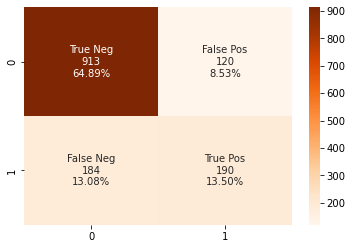

In [56]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [58]:
coef_v = pd.DataFrame(logit_model.fit().params, columns= ['coef'])
p_val= pd.DataFrame(logit_model.fit().pvalues, columns=['pval'])
a_coef = pd.DataFrame(abs(logit_model.fit().params), columns= ['a_coef'])
val_tab = pd.concat([a_coef,coef_v, p_val,], axis = 1)
val_tab

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
Optimization terminated successfully.
         Current function value: inf
         Iterations 8
Optimization terminated successfully.
         Current function value: inf
         Iterations 8


,a_coef,coef,pval
SeniorCitizen,0.147315,0.147315,7.933112e-02
TotalCharges,0.000303,-0.000303,1.453687e-28
gender_Male,0.151218,-0.151218,1.442515e-02
Partner_Yes,0.125285,-0.125285,9.721176e-02
Dependents_Yes,0.234248,-0.234248,7.868915e-03
MultipleLines_No phone service,0.003475,0.003475,9.762437e-01
MultipleLines_Yes,0.191809,0.191809,1.290271e-02
InternetService_Fiber optic,0.775636,0.775636,5.208670e-20
InternetService_No,1.352493,-1.352493,2.265268e-28
OnlineSecurity_Yes,0.495386,-0.495386,1.373108e-09


In [59]:
val_tab = val_tab[(val_tab['pval'] < 0.05)==True]
top_3_pval = val_tab.sort_values(by = 'a_coef', ascending = False).head(20)
top_3_pval

,a_coef,coef,pval
Contract_Two year,1.702677,-1.702677,7.708857e-24
InternetService_No,1.352493,-1.352493,2.265268e-28
Contract_One year,0.890382,-0.890382,6.766676e-18
InternetService_Fiber optic,0.775636,0.775636,5.208670e-20
OnlineSecurity_Yes,0.495386,-0.495386,1.373108e-09
PaymentMethod_Credit card (automatic),0.425585,-0.425585,2.587499e-05
TechSupport_Yes,0.401870,-0.401870,1.379110e-06
PaymentMethod_Mailed check,0.317358,-0.317358,5.606923e-04
StreamingMovies_Yes,0.302081,0.302081,1.313287e-04
StreamingTV_Yes,0.302053,0.302053,1.330963e-04


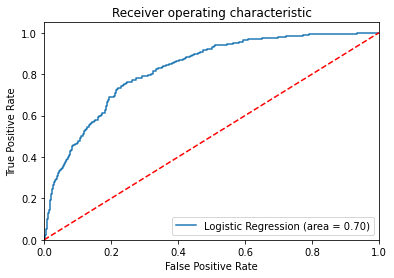

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# DECISION TREE CLASSIFIER

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model1 = tree.DecisionTreeClassifier(max_depth = 4)
model1.fit(x_train, y_train)
predictions = model1.predict(x_test)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.68      0.40      0.51       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.78      0.79      0.77      1407



<AxesSubplot:>

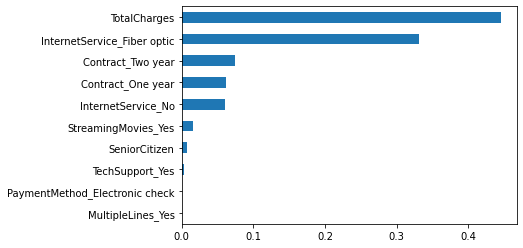

In [63]:
importances = model1.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [64]:
y_pred1 = model1.predict(x_test)
print('Accuracy of Descision Tree classifier on test set: {:f}'.format(model1.score(x_test, y_test)))

Accuracy of Descision Tree classifier on test set: 0.790334


In [65]:
from sklearn.metrics import confusion_matrix
cf_matrix1 = confusion_matrix(y_test, y_pred1)
print(cf_matrix1)

[[961  72]
 [223 151]]


<AxesSubplot:>

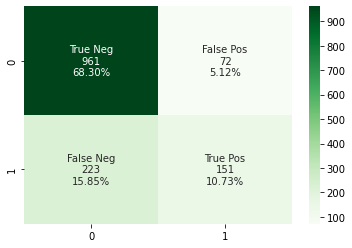

In [66]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Greens')

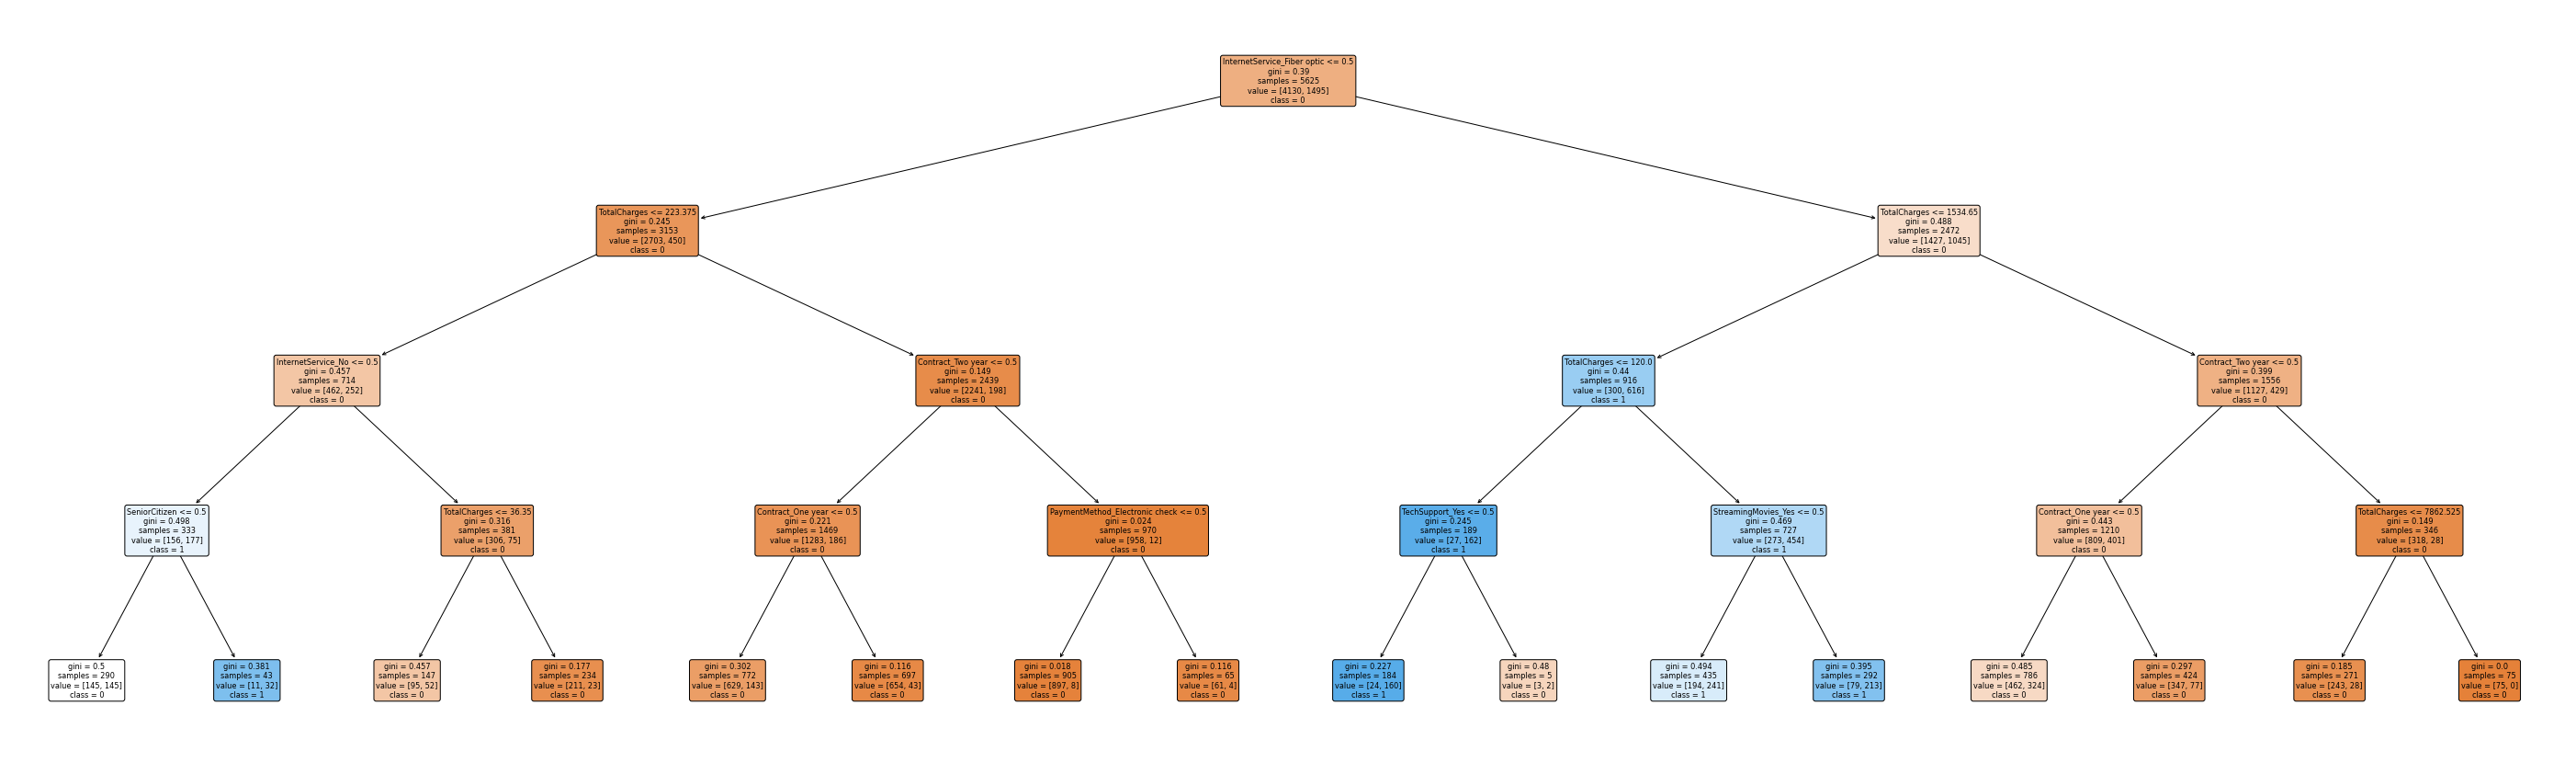

In [67]:
plt.figure(figsize=(50,15))
feature_names = x.columns.values.tolist()
target_names = ['0','1']

tree.plot_tree(model1, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
plt.savefig('DecisionTreeChurn.png') 

# RANDOM FOREST CLASSIFIER

In [68]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier

rfc=RandomForestClassifier(n_estimators=5000, max_depth=4)

#Train the model using the training sets y_pred=clf.predict(X_test)

rfc.fit(x_train,y_train)
y_predrfc = rfc.predict(x_test)

In [69]:
print('Accuracy of Random Forest classifier on test set: {:f}'.format(rfc.score(x_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.783227


<AxesSubplot:>

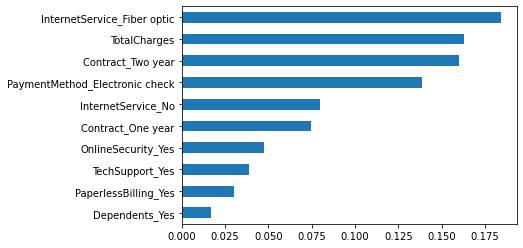

In [70]:
importances1 = rfc.feature_importances_
weights = pd.Series(importances1,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_predrfc))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1033
           1       0.73      0.29      0.41       374

    accuracy                           0.78      1407
   macro avg       0.76      0.63      0.64      1407
weighted avg       0.77      0.78      0.75      1407



In [72]:
from sklearn.metrics import confusion_matrix
cf_matrix2 = confusion_matrix(y_test, y_predrfc)
print(cf_matrix2)

[[994  39]
 [266 108]]


<AxesSubplot:>

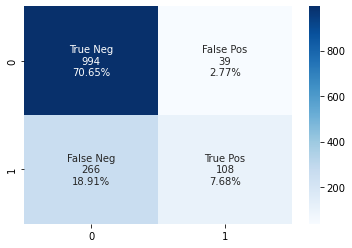

In [73]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues')

# XGBOOST CLASSIFIER

In [74]:
from xgboost import XGBClassifier
import sklearn.metrics as metrics
model_n = XGBClassifier()
model_n.fit(x_train, y_train)
preds_xg = model_n.predict(x_test)
metrics.accuracy_score(y_test, preds_xg)

0.7846481876332623

In [75]:
from sklearn.metrics import confusion_matrix
cf_matrix3 = confusion_matrix(y_test, preds_xg)
print(cf_matrix3)

[[919 114]
 [189 185]]


<AxesSubplot:>

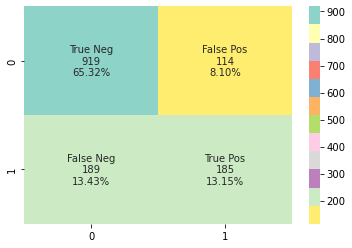

In [76]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix3, annot=labels, fmt='', cmap='Set3_r')

<AxesSubplot:>

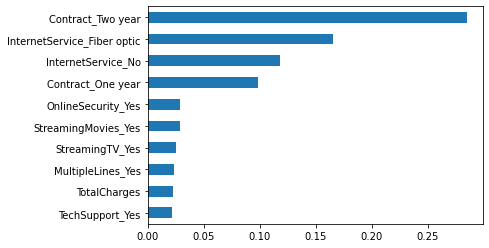

In [77]:
importances2 = model_n.feature_importances_
weights = pd.Series(importances2,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# MODEL COMAPARISON - BENCHMARKING METRICS

In [83]:
# lOGISTIC MODEL

print('Accuracy  | '+str(round(accuracy_score(y_test, y_pred)*100,2))+'%')
print('Precision | '+str(round(precision_score(y_test, y_pred)*100,2))+'%')
print('Recall    | '+str(round(recall_score(y_test, y_pred)*100,2))+'%')
print('MSE       | '+str(round(mean_squared_error(y_test, y_pred)*100,2))+'%')
print('ROC_AUC   | '+str(round(roc_auc_score(y_test,y_pred)*100,2))+'%')


Accuracy  | 78.39%
Precision | 61.29%
Recall    | 50.8%
MSE       | 21.61%
ROC_AUC   | 69.59%


In [84]:
# Decision Tree 
print('Accuracy  | '+str(round(accuracy_score(y_test, y_pred1)*100,2))+'%')
print('Precision | '+str(round(precision_score(y_test, y_pred1)*100,2))+'%')
print('Recall    | '+str(round(recall_score(y_test, y_pred1)*100,2))+'%')
print('MSE       | '+str(round(mean_squared_error(y_test, y_pred1)*100,2))+'%')
print('ROC_AUC   | '+str(round(roc_auc_score(y_test,y_pred1)*100,2))+'%')

Accuracy  | 79.03%
Precision | 67.71%
Recall    | 40.37%
MSE       | 20.97%
ROC_AUC   | 66.7%


In [85]:
# Random Forest Classifier
print('Accuracy  | '+str(round(accuracy_score(y_test, y_predrfc)*100,2))+'%')
print('Precision | '+str(round(precision_score(y_test, y_predrfc)*100,2))+'%')
print('Recall    | '+str(round(recall_score(y_test, y_predrfc)*100,2))+'%')
print('MSE       | '+str(round(mean_squared_error(y_test, y_pred1)*100,2))+'%')
print('ROC_AUC   | '+str(round(roc_auc_score(y_test,y_predrfc)*100,2))+'%')

Accuracy  | 78.32%
Precision | 73.47%
Recall    | 28.88%
MSE       | 20.97%
ROC_AUC   | 62.55%


In [86]:
# XGBoost
print('Accuracy  | '+str(round(accuracy_score(y_test, preds_xg)*100,2))+'%')
print('Precision | '+str(round(precision_score(y_test, preds_xg)*100,2))+'%')
print('Recall    | '+str(round(recall_score(y_test, preds_xg)*100,2))+'%')
print('MSE       | '+str(round(mean_squared_error(y_test, preds_xg)*100,2))+'%')
print('ROC_AUC   | '+str(round(roc_auc_score(y_test,preds_xg)*100,2))+'%')

Accuracy  | 78.46%
Precision | 61.87%
Recall    | 49.47%
MSE       | 21.54%
ROC_AUC   | 69.21%
